In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score

plt.style.use(['seaborn-notebook', 'seaborn-white', 'seaborn-ticks'])

import mlgrad.func as func
import mlgrad.avragg as avragg
import mlgrad.mlocation_scatter2 as mlocation_scatter

from mlgrad import averager_it

In [2]:
import matplotlib as mpl

In [3]:
mpl.rcParams['figure.autolayout'] = True
#mpl.rcParams

In [4]:
def permutate_values(Yp, Y, m):
    d = {}
    for yp,y in zip(Yp, Y):
        c = d.setdefault((yp,y), 0)
        d[(yp,y)] = c+1
    print(d)
    values = np.array(list(d.values()))
    keys = list(d.keys())
    indices = list(np.argsort(values))
    keys = [keys[indices[-i]] for i in range(1,m+1)]
    print(keys)
    d = dict(keys)
    for i in range(len(Y)):
        yp = Yp[i]
        Yp[i] = d[yp]

In [5]:
iris = pd.read_csv("data/iris.data")

In [6]:
cls_seq = iris["cls"]
cls_names = list(cls_seq.unique())
cls_names

['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

In [7]:
Y = np.array([cls_names.index(name)+1 for name in cls_seq])
X0 = np.c_[iris["sl"],iris["sw"],iris["pl"],iris["pw"]]

pca = PCA(2)
X = pca.fit_transform(X0)
X = np.ascontiguousarray(X)

In [8]:
I1 = (Y == 1)
I2 = (Y == 2)
I3 = (Y == 3)

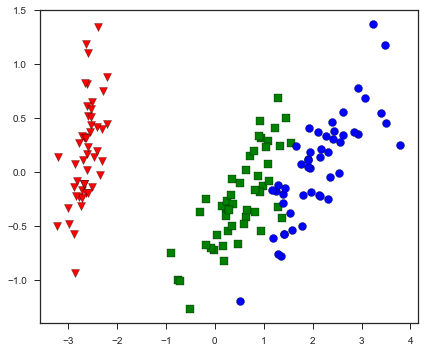

In [9]:
plt.figure(figsize=(6,5))
plt.scatter(X[I1,0], X[I1,1], c='r', edgecolors='k', marker='v', s=64)
plt.scatter(X[I2,0], X[I2,1], c='g', edgecolors='k', marker='s', s=64)
plt.scatter(X[I3,0], X[I3,1], c='b', edgecolors='k', marker='o', s=64)
plt.show()

In [10]:
avrfunc = averager_it(func.QuantileFunc(0.94, func.Sqrt(0.001)))
avrfunc = avragg.WMAverage(avrfunc)
hcd = mlocation_scatter.MLocationsScattersEstimator(avrfunc, 3, 
                                    tol=1.0e-9, n_iter=1000, n_step=20)

In [11]:
hcd.fit(X)

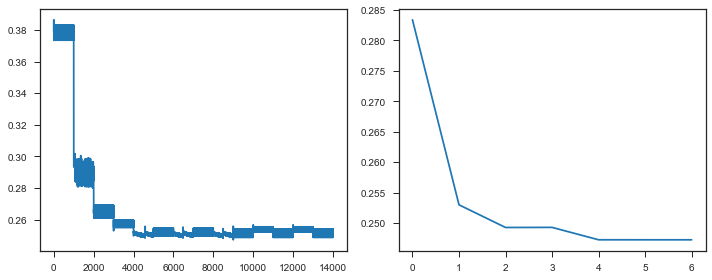

In [12]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(hcd.dvals)
plt.subplot(1,2,2)
plt.plot(hcd.dvals2)
plt.show()

In [13]:
xrange1 = np.linspace(-4., 4., 100)
xrange2 = np.linspace(-1.5, 1.5, 100)
XX1, XX2, = np.meshgrid(xrange1, xrange2)
XX = np.c_[XX1.ravel(), XX2.ravel()]
D = hcd.evaluate_dist(XX)
# C = hcd.evaluate(XX)
# CC = np.asarray(C).reshape(XX1.shape)
DD = D.reshape(XX1.shape)
print(D.min(), D.max())

0.0001802904465537053 19.176094184148937


In [14]:
Y_p = np.array(hcd.evaluate(X))
permutate_values(Y_p, Y, 3)
print(accuracy_score(Y, Y_p))

{(1, 1): 50, (2, 2): 47, (0, 2): 3, (0, 3): 50}
[(0, 3), (1, 1), (2, 2)]
0.98


In [15]:
II = (Y == Y_p)
ec1 = [('w' if b else 'k') for a, b in zip(I1, II) if a]
ec2 = [('w' if b else 'k') for a, b in zip(I2, II) if a]
ec3 = [('w' if b else 'k') for a, b in zip(I3, II) if a]

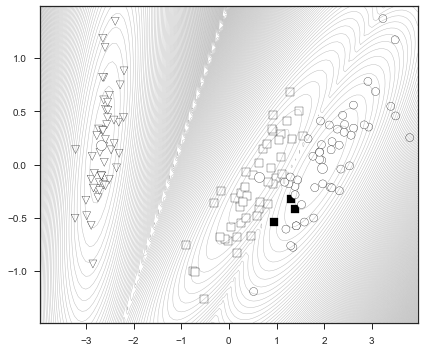

In [16]:
plt.figure(figsize=(6,5))
plt.contour(DD, origin='lower', extent=(-4,4,-1.5,1.5), 
            levels=np.linspace(0.,25,200), colors='k', linewidths=0.5, alpha=0.25)
plt.scatter(X[I1,0], X[I1,1], c=ec1, edgecolors='k', marker='v', s=64)
plt.scatter(X[I2,0], X[I2,1], c=ec2, edgecolors='k', marker='s', s=64)
plt.scatter(X[I3,0], X[I3,1], c=ec3, edgecolors='k', marker='o', s=64)
plt.scatter(hcd.locs[:,0], hcd.locs[:,1], c='w', edgecolors='k', s=100)
plt.show()

### Среднее арифметическое

In [22]:
arith = avragg.ArithMean()
km = mlocation_scatter.MLocationsScattersEstimator(arith, 3, 
                                    tol=1.0e-9, n_iter=1000, n_step=100)

In [23]:
km.fit(X)

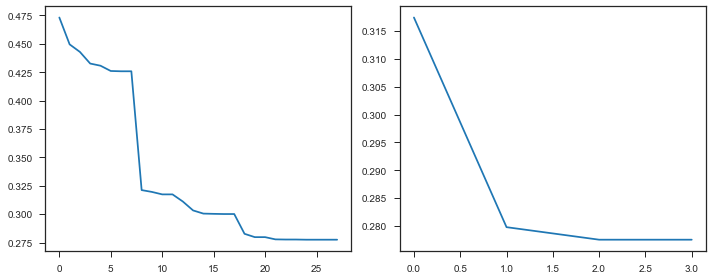

In [24]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(km.dvals)
plt.subplot(1,2,2)
plt.plot(km.dvals2)
plt.show()

In [25]:
xrange1 = np.linspace(-4., 4., 100)
xrange2 = np.linspace(-1.5, 1.5, 100)
XX1, XX2, = np.meshgrid(xrange1, xrange2)
XX = np.c_[XX1.ravel(), XX2.ravel()]
D2 = km.evaluate_dist(XX)
# C = km.evaluate(XX)
# CC = np.asarray(C).reshape(XX1.shape)
DD2 = D2.reshape(XX1.shape)
print(D2.min(), D2.max())

0.00019379244185992542 19.097649293820236


In [26]:
Y2_p = np.array(km.evaluate(X))
permutate_values(Y2_p, Y, 3)
print(accuracy_score(Y, Y2_p))

{(2, 1): 50, (1, 2): 47, (0, 2): 3, (0, 3): 49, (1, 3): 1}
[(2, 1), (0, 3), (1, 2)]
0.9733333333333334


In [27]:
JJ = (Y == Y2_p)
ec1_km = [('r' if b else 'k') for a, b in zip(I1, JJ) if a]
ec2_km = [('g' if b else 'k') for a, b in zip(I2, JJ) if a]
ec3_km = [('b' if b else 'k') for a, b in zip(I3, JJ) if a]

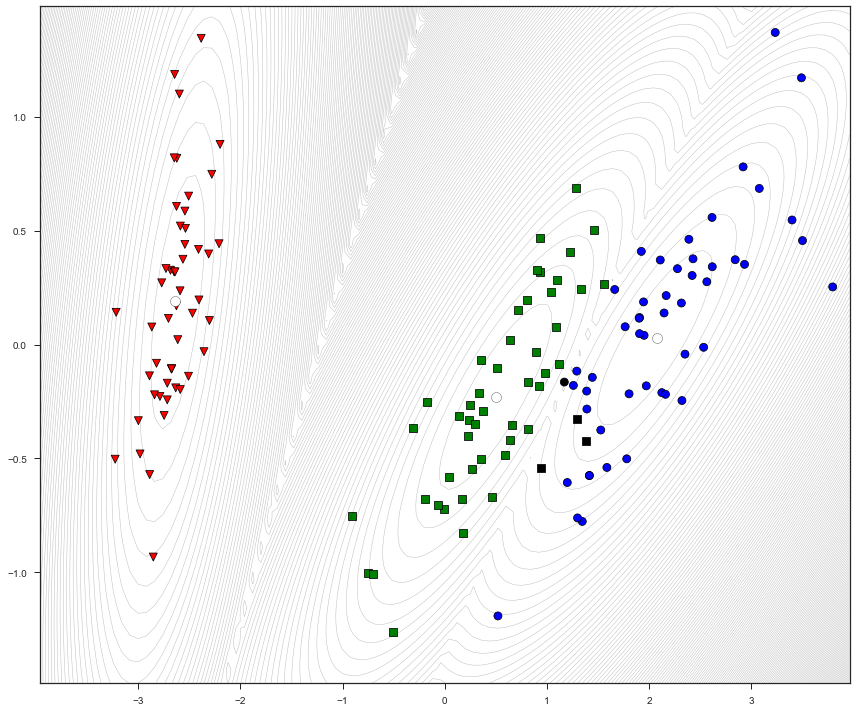

In [28]:
plt.figure(figsize=(12,10))
plt.contour(DD2, origin='lower', extent=(-4,4,-1.5,1.5), 
            levels=np.linspace(0.,25,200), colors='k', linewidths=0.5, alpha=0.25)
plt.scatter(X[I1,0], X[I1,1], c=ec1_km, edgecolors='k', marker='v', s=64, linewidth=0.75)
plt.scatter(X[I2,0], X[I2,1], c=ec2_km, edgecolors='k', marker='s', s=64, linewidth=0.75)
plt.scatter(X[I3,0], X[I3,1], c=ec3_km, edgecolors='k', marker='o', s=64, linewidth=0.75)
plt.scatter(km.locs[:,0], km.locs[:,1], c='w', edgecolors='k', s=100)
plt.show()

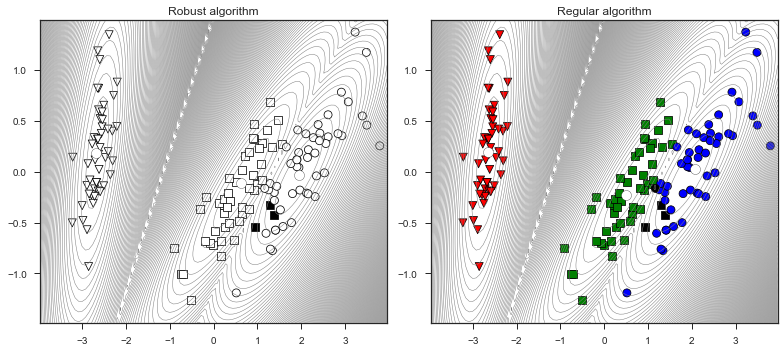

In [29]:
plt.figure(figsize=(11,5))
# plt.subplot(1,3,1)
# plt.title('IRIS Data')
# plt.scatter(X[I1,0], X[I1,1], c='w', edgecolors='k', marker='v', s=64)
# plt.scatter(X[I2,0], X[I2,1], c='w', edgecolors='k', marker='s', s=64)
# plt.scatter(X[I3,0], X[I3,1], c='w', edgecolors='k', marker='o', s=64)

plt.subplot(1,2,1)
plt.title('Robust algorithm')
plt.contour(DD, origin='lower', extent=(-4,4,-1.5,1.5), 
            levels=np.linspace(0.,25,200), colors='Grey', linewidths=0.5)
plt.scatter(X[I1,0], X[I1,1], c=ec1, edgecolors='k', marker='v', s=64, linewidth=0.75)
plt.scatter(X[I2,0], X[I2,1], c=ec2, edgecolors='k', marker='s', s=64, linewidth=0.75)
plt.scatter(X[I3,0], X[I3,1], c=ec3, edgecolors='k', marker='o', s=64, linewidth=0.75)
# plt.yticks([],[])
plt.scatter(hcd.locs[:,0], hcd.locs[:,1], c='w', edgecolors='k', s=100)

plt.subplot(1,2,2)
plt.title('Regular algorithm')
plt.contour(DD, origin='lower', extent=(-4,4,-1.5,1.5), 
            levels=np.linspace(0.,25,200), colors='Grey', linewidths=0.5)
plt.scatter(X[I1,0], X[I1,1], c=ec1_km, edgecolors='k', marker='v', s=64, linewidth=0.75)
plt.scatter(X[I2,0], X[I2,1], c=ec2_km, edgecolors='k', marker='s', s=64, linewidth=0.75)
plt.scatter(X[I3,0], X[I3,1], c=ec3_km, edgecolors='k', marker='o', s=64, linewidth=0.75)
# plt.yticks([],[])
plt.scatter(km.locs[:,0], km.locs[:,1], c='w', edgecolors='k', s=100)
plt.savefig('fig/robust_kmeans_center_variance_iris.eps')
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
clf_skl = KMeans(3)

In [ ]:
clf_skl.fit(X)

In [ ]:
Y_skl = clf_skl.predict(X)

In [ ]:
Y_skl = np.array(Y_skl)
permutate_values(Y_skl, Y, 3)
accuracy_score(Y, Y_skl)

In [ ]:
xrange1 = np.linspace(-4., 4., 100)
xrange2 = np.linspace(-1.5, 1.5, 100)
XX1, XX2, = np.meshgrid(xrange1, xrange2)
XX = np.c_[XX1.ravel(), XX2.ravel()]
D3 = clf_skl.transform(XX)
D3 = D3.min(axis=1)
DD3 = D3.reshape(XX1.shape)
print(D3.min(), D3.max())

In [ ]:
150-sum(Y_skl==Y)

In [ ]:
II3 = (Y == Y_skl)
ec31 = [('w' if b else 'k') for a, b in zip(I1, II3) if a]
ec32 = [('w' if b else 'k') for a, b in zip(I2, II3) if a]
ec33 = [('w' if b else 'k') for a, b in zip(I3, II3) if a]

In [ ]:
plt.figure(figsize=(6,5))
plt.contour(DD3, origin='lower', extent=(-4,4,-1.5,1.5), 
            levels=np.linspace(0.,25,200), colors='k', linewidths=0.5, alpha=0.25)
plt.scatter(X[I1,0], X[I1,1], c=ec31, edgecolors='k', marker='v', s=64, linewidth=0.75)
plt.scatter(X[I2,0], X[I2,1], c=ec32, edgecolors='k', marker='s', s=64, linewidth=0.75)
plt.scatter(X[I3,0], X[I3,1], c=ec33, edgecolors='k', marker='o', s=64, linewidth=0.75)
plt.scatter(clf_skl.cluster_centers_[:,0], clf_skl.cluster_centers_[:,1], c='w', edgecolors='k', s=100)
plt.show()